In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from kneed import KneeLocator

import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('importCleaned.csv')
df.head()

,imports,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1257.0,1432.0,1447.0,1336.0,1538.0,1577.0,1601.0,1968.0,1901.0,1309.0,1369.0,1452.0,1559.0,1555.0,0.0,0.0,0.0,0.0,0.0
1,Belgium,3491.0,3209.0,3792.0,3818.0,3968.0,4063.0,4605.0,4014.0,6792.0,5916.0,5924.0,5828.0,5668.0,5502.0,0.0,0.0,0.0,0.0,0.0
2,Bulgaria,281.0,355.0,343.0,400.0,367.0,441.0,435.0,393.0,517.0,523.0,528.0,482.0,560.0,609.0,0.0,0.0,0.0,0.0,0.0
3,Croatia,344.0,352.0,371.0,393.0,388.0,392.0,404.0,414.0,405.0,394.0,394.0,391.0,384.0,413.0,0.0,0.0,0.0,0.0,0.0
4,Cyprus,69.0,59.0,57.0,59.0,59.0,80.0,74.0,71.0,78.0,72.0,77.0,82.0,84.0,94.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#picking year 2013 because the data are missing for most country from 2014 onwards

X = df.iloc[:34,[1,14]]
print(X)

       2000     2013
0    1257.0   1555.0
1    3491.0   5502.0
2     281.0    609.0
3     344.0    413.0
4      69.0     94.0
5     809.0   1184.0
6    1022.0    921.0
7     105.0    156.0
8    1063.0   1275.0
9    6520.0   6713.0
10  13895.0  21174.0
11    798.0   1269.0
12    790.0    557.0
13    155.0    233.0
14   6315.0   8823.0
15    181.0    161.0
16    213.0    362.0
17    232.0    378.0
18      9.0     22.0
19   2966.0   3407.0
20   2576.0   3284.0
21    811.0   1063.0
22    552.0    971.0
23    286.0    798.0
24    187.0    258.0
25   3768.0   5137.0
26   1344.0   1709.0
27   3012.0   4206.0
28   6908.0   8381.0
29    662.0    781.0
30   1890.0   4410.0
31   1171.0   2667.0
32    192.0    439.0
33  23767.0  27016.0


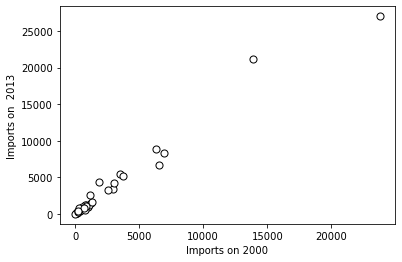

In [42]:
x_= df.iloc[:34,1]
y_= df.iloc[:34,14]
plt.scatter(
   x_, y_,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Imports on 2000")
plt.ylabel("Imports on  2013")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=2, random_state=0) 

label = kmeans.fit(X)
labels = label.labels_
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


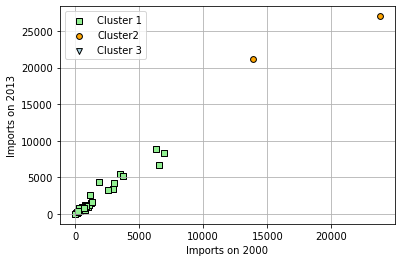

In [51]:
plt.scatter(
    X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1],
    s=34, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1],
    s=34, c='orange',
    marker='o', edgecolor='black',
    label='Cluster2'
)

plt.scatter(
    X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],
    s=34, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Imports on 2000")
plt.ylabel("Imports on 2013")
plt.show()

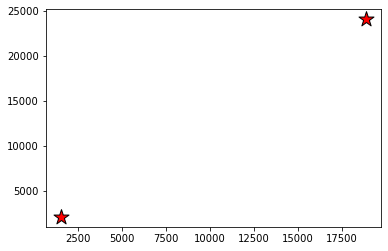

In [47]:
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

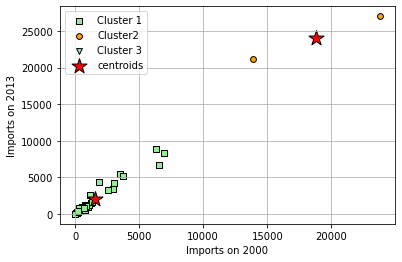

In [53]:
#combine

plt.scatter(
    X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1],
    s=34, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1],
    s=34, c='orange',
    marker='o', edgecolor='black',
    label='Cluster2'
)

plt.scatter(
    X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],
    s=34, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Imports on 2000")
plt.ylabel("Imports on 2013")
plt.show()

In [54]:
distortions = []
for i in range(1, 35):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    print(i, distortions)


C:\Users\NISA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 [1842401717.2058825]
2 [1842401717.2058825, 371786219.09375]
3 [1842401717.2058825, 371786219.09375, 140454909.13043478]
4 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478]
5 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478, 78904832.49206348]
6 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478, 78904832.49206348, 76512680.55]
7 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478, 78904832.49206348, 76512680.55, 74306152.33333334]
8 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478, 78904832.49206348, 76512680.55, 74306152.33333334, 73764556.5]
9 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478, 78904832.49206348, 76512680.55, 74306152.33333334, 73764556.5, 71311378.56666666]
10 [1842401717.2058825, 371786219.09375, 140454909.13043478, 87478040.63043478, 78904832.49206348, 76512680.55, 74306152.33333334, 73764556.5, 71311378.5666

In [55]:
kl = KneeLocator(range(1, 35), distortions, curve="convex", direction="decreasing")
kl.elbow

3

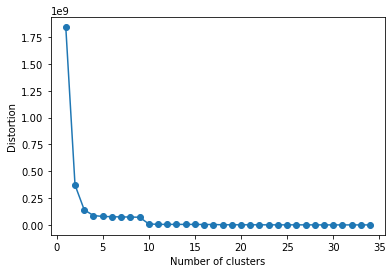

In [56]:
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()